In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/ME/M.E Semester 3/SAT- IoT/Data- Parkinsons Analysis/Activity 1 Final Data/"

acc_final.csv	    acc_final_v3_2.csv	 grav_final_v2.csv  rot_final_v2.csv
acc_final_v2.csv    acc_final_v3_3.csv	 gyro_final.csv     saved__model.sav
acc_final_v3_0.csv  finalized_model.sav  gyro_final_v2.csv
acc_final_v3_1.csv  grav_final.csv	 rot_final.csv


In [0]:
import pandas as pd
PATH2="/content/drive/My Drive/ME/M.E Semester 3/SAT- IoT/Data- Parkinsons Analysis/Activity 1 Final Data/"
acc0 = pd.read_csv(PATH2+"acc_final_v3_0.csv",engine='python')
acc1 = pd.read_csv(PATH2+"acc_final_v3_1.csv",engine='python')
acc2 = pd.read_csv(PATH2+"acc_final_v3_2.csv",engine='python')
acc3 = pd.read_csv(PATH2+"acc_final_v3_3.csv",engine='python')
# gyro= pd.read_csv(PATH2+"gyro_final.csv")
# grav= pd.read_csv(PATH2+"grav_final.csv")
# rot= pd.read_csv(PATH2+"rot_final.csv")

In [0]:
import numpy as np

In [0]:
train=pd.concat([acc0,acc1,acc2,acc3],axis=0)
train['Tremor']=train['Tremor'].replace(2,1)

In [0]:
df= pd.concat([acc0,acc1,acc2,acc3],axis=0)

In [0]:
y=df['Tremor']

In [0]:
X=df.drop(['Tremor'],axis=1)
type(X)

pandas.core.frame.DataFrame

In [0]:
y=y.replace(2,1)

In [29]:
np.unique(y)

array([0, 1])

In [28]:
print(X.shape)
y.shape

(1505, 33)


(1505,)

In [0]:
X.columns

Index(['accX_mean', 'accY_mean', 'accZ_mean', 'accX_mad', 'accY_mad',
       'accZ_mad', 'accX_std', 'accY_std', 'accZ_std', 'accX_min', 'accY_min',
       'accZ_min', 'accX_max', 'accY_max', 'accZ_max', 'accX_iqr', 'accY_iqr',
       'accZ_iqr', 'accX_skew', 'accY_skew', 'accZ_skew', 'accX_kurtosis',
       'accY_kurtosis', 'accZ_kurtosis', 'accX_sma', 'accY_sma', 'accZ_sma',
       'accX_energy', 'accY_energy', 'accZ_energy', 'accX_entropy',
       'accY_entropy', 'accZ_entropy'],
      dtype='object')

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
labels=[0,1]

#Functions

###Function to plot confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [0]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# Scale Data

In [0]:
from sklearn.preprocessing import normalize
X_norm= normalize(X, norm='l2')

In [0]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X_norm)

In [0]:
from sklearn.preprocessing import MinMaxScaler
X_new2 = MinMaxScaler().fit_transform(X_norm)

# Train-Test Split

In [0]:

from sklearn.model_selection import train_test_split

In [0]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [0]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new2, y, test_size=0.33, random_state=42)

In [0]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Without Normalizing & Standardizing

##Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:26.014438


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001535


---------------------
|      Accuracy      |
---------------------

    0.772635814889336


--------------------
| Confusion Matrix |
--------------------

 [[230   0]
 [113 154]]


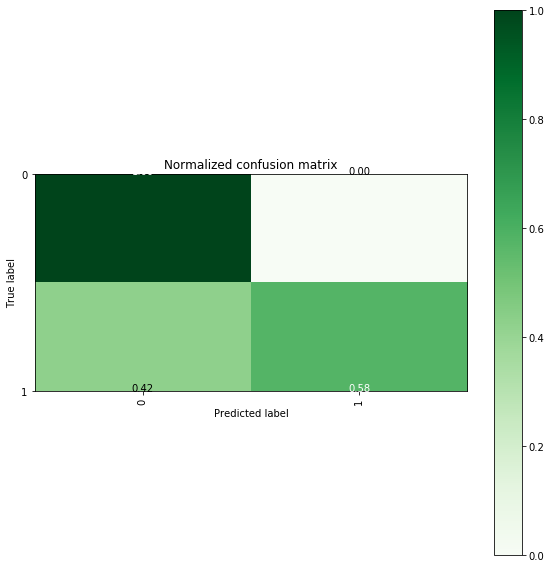

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       230
           1       1.00      0.58      0.73       267

    accuracy                           0.77       497
   macro avg       0.84      0.79      0.77       497
weighted avg       0.85      0.77      0.76       497



In [0]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


In [0]:
# observe the attributes of the model 

print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.01, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7361111111111112



In [0]:
# model= linear_model.LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l1',
#                    random_state=None, solver='warn', tol=0.0001, verbose=0,
#                    warm_start=False)
# model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# from sklearn.externals import joblib
# filename = PATH2+'saved__model.sav'
# joblib.dump(model, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/ME/M.E Semester 3/SAT- IoT/Data- Parkinsons Analysis/Activity 1 Final Data/saved__model.sav']

## SVM with Grid Search 

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.233399


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.026685


---------------------
|      Accuracy      |
---------------------

    0.6579476861167002


--------------------
| Confusion Matrix |
--------------------

 [[ 60 170]
 [  0 267]]


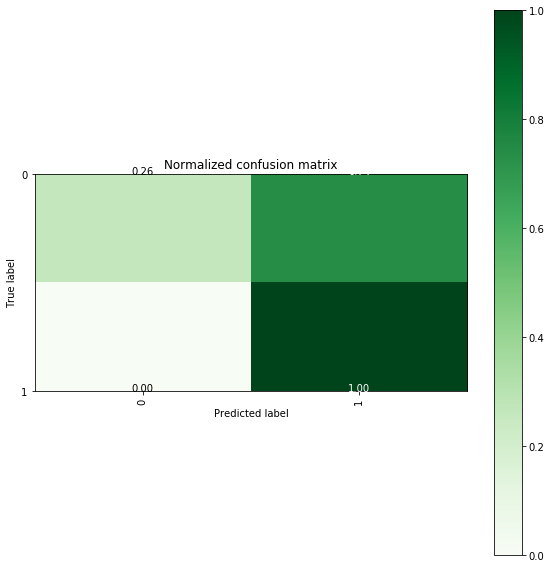

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.26      0.41       230
           1       0.61      1.00      0.76       267

    accuracy                           0.66       497
   macro avg       0.81      0.63      0.59       497
weighted avg       0.79      0.66      0.60       497



In [0]:

parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

##.Linear SVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.487407


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001417


---------------------
|      Accuracy      |
---------------------

    0.9517102615694165


--------------------
| Confusion Matrix |
--------------------

 [[223   7]
 [ 17 250]]


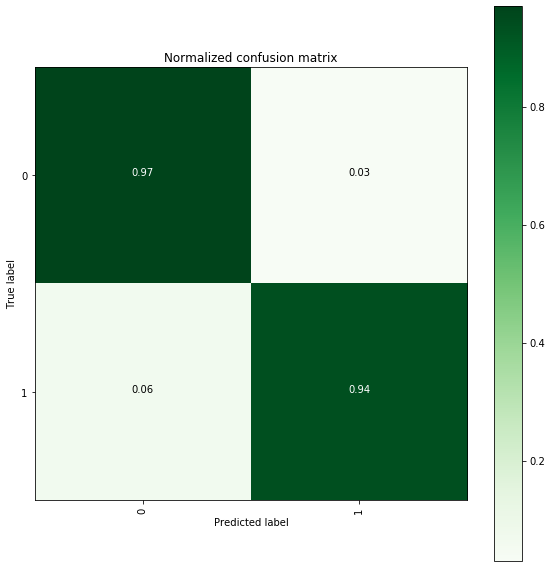

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       230
           1       0.97      0.94      0.95       267

    accuracy                           0.95       497
   macro avg       0.95      0.95      0.95       497
weighted avg       0.95      0.95      0.95       497



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [0]:
finalized_model_linear_svc= LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
finalized_model_linear_svc.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

In [0]:
import pickle
filename = PATH2+'finalized_model_2.sav'
pickle.dump(finalized_model_linear_svc, open(filename, 'wb'),protocol=2)

In [0]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9702380952380952



## Comparing All Models ALl Features

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 77.26%       22.74%
Linear SVC          : 94.77%       5.231% 
rbf SVM classifier  : 65.79%      34.21% 


In [0]:
# Keras-> logistic Regression
# Correlation matrix


In [0]:
X.shape

(1505, 34)

#Dropping Features

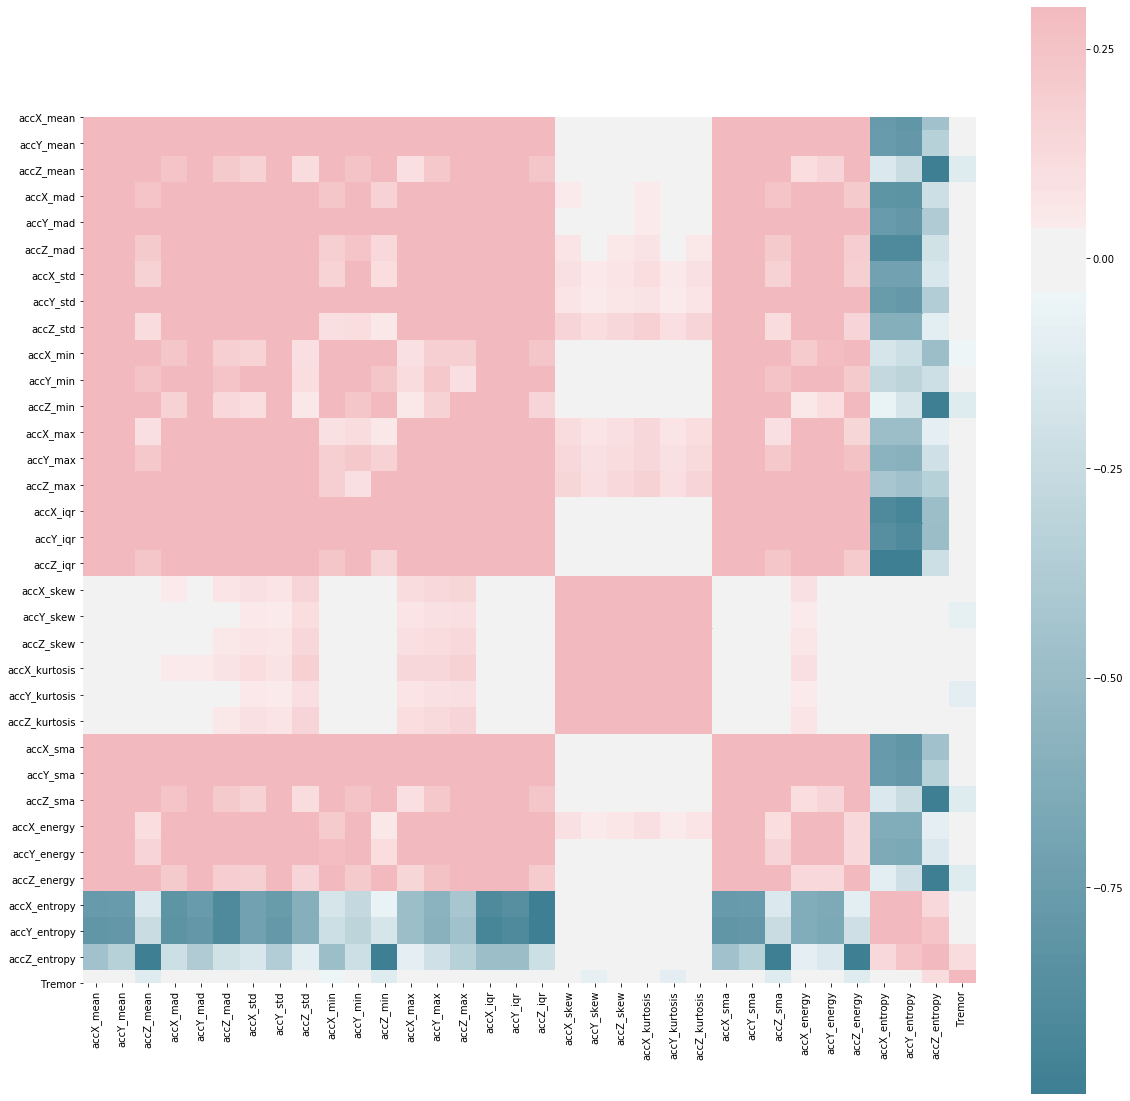

In [0]:
import seaborn as sns
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, ax=ax)


In [0]:
features=['accZ_mean','accZ_min','accY_skew','accY_kurtosis','accZ_sma','accZ_entropy','accZ_energy']
X2= X[features]

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.33, random_state=42)

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   18.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:22.526782


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001398


---------------------
|      Accuracy      |
---------------------

    0.45472837022132795


--------------------
| Confusion Matrix |
--------------------

 [[131  99   0]
 [130  95   0]
 [ 25  17   0]]


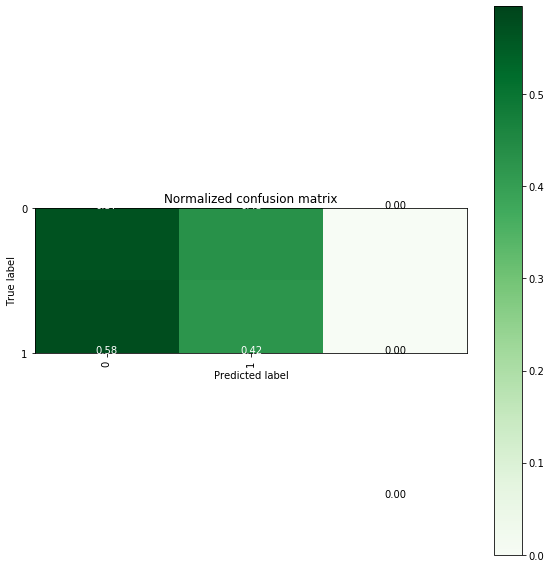

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       230
           1       0.45      0.42      0.44       225
           2       0.00      0.00      0.00        42

    accuracy                           0.45       497
   macro avg       0.30      0.33      0.31       497
weighted avg       0.42      0.45      0.43       497



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2','l1']}
log_reg2 = linear_model.LogisticRegression()
log_reg_grid2 = GridSearchCV(log_reg2, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results2 =  perform_model(log_reg_grid2, X_train2, y_train2, X_test2, y_test2, class_labels=labels)

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.014023


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012996


---------------------
|      Accuracy      |
---------------------

    0.6297786720321932


--------------------
| Confusion Matrix |
--------------------

 [[ 88 142   0]
 [  0 225   0]
 [  0  42   0]]


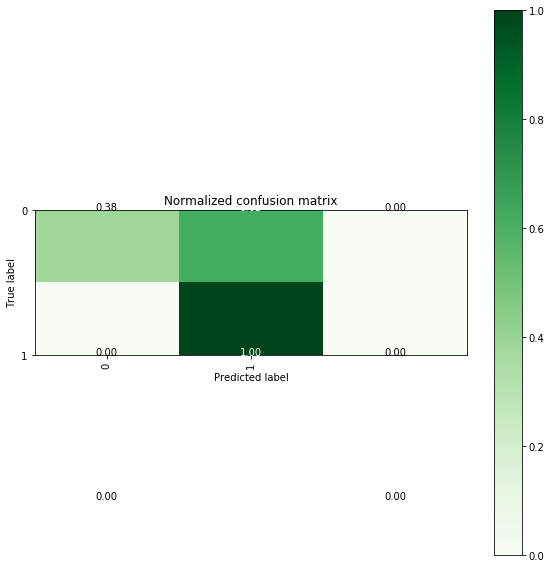

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.38      0.55       230
           1       0.55      1.00      0.71       225
           2       0.00      0.00      0.00        42

    accuracy                           0.63       497
   macro avg       0.52      0.46      0.42       497
weighted avg       0.71      0.63      0.58       497



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm2 = SVC(kernel='rbf')
rbf_svm_grid2 = GridSearchCV(rbf_svm2,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results2 = perform_model(rbf_svm_grid2, X_train2, y_train2, X_test2, y_test2, class_labels=labels)

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.299899


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001109


---------------------
|      Accuracy      |
---------------------

    0.46277665995975853


--------------------
| Confusion Matrix |
--------------------

 [[226   4   0]
 [221   4   0]
 [ 42   0   0]]


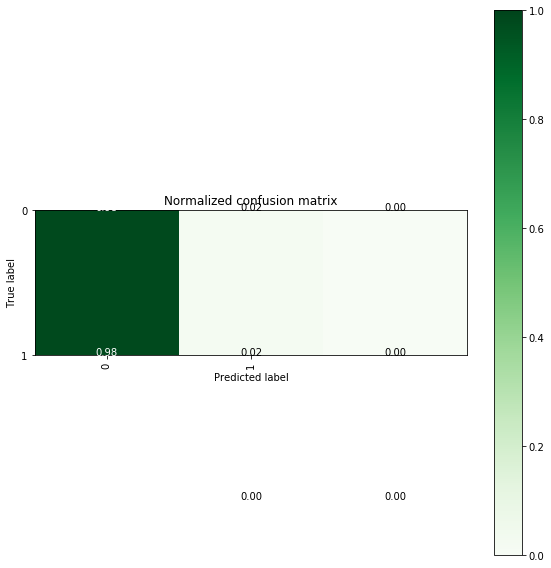

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.46      0.98      0.63       230
           1       0.50      0.02      0.03       225
           2       0.00      0.00      0.00        42

    accuracy                           0.46       497
   macro avg       0.32      0.33      0.22       497
weighted avg       0.44      0.46      0.31       497



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc2 = LinearSVC(tol=0.00005)
lr_svc_grid2 = GridSearchCV(lr_svc2, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results2 = perform_model(lr_svc_grid2, X_train2, y_train2, X_test2, y_test2, class_labels=labels)

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results2['accuracy'] * 100,\
                                                  100-(log_reg_grid_results2['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results2['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results2['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results2['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results2['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 45.47%       54.53%
Linear SVC          : 46.28%       53.72% 
rbf SVM classifier  : 62.98%      37.02% 


#Only Normalization

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.737963


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000529


---------------------
|      Accuracy      |
---------------------

    0.9195171026156942


--------------------
| Confusion Matrix |
--------------------

 [[223   7]
 [ 33 234]]


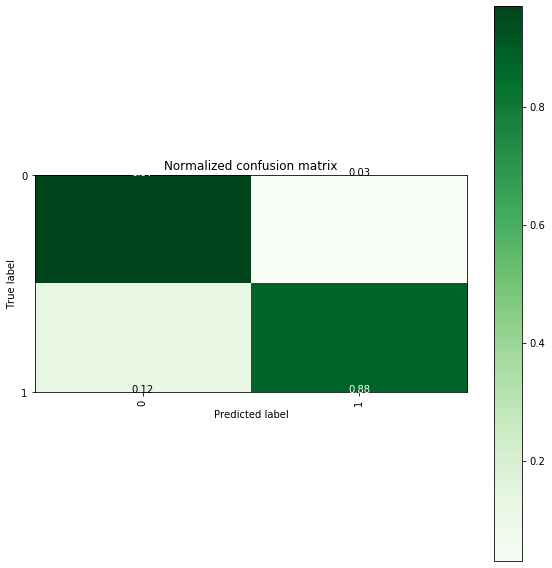

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       230
           1       0.97      0.88      0.92       267

    accuracy                           0.92       497
   macro avg       0.92      0.92      0.92       497
weighted avg       0.92      0.92      0.92       497



In [0]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2','l1']}
log_reg5 = linear_model.LogisticRegression()
log_reg_grid5 = GridSearchCV(log_reg5, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results5 =  perform_model(log_reg_grid5, X_train5, y_train5, X_test5, y_test5, class_labels=labels)


training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.582344


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005577


---------------------
|      Accuracy      |
---------------------

    0.9436619718309859


--------------------
| Confusion Matrix |
--------------------

 [[210  20]
 [  8 259]]


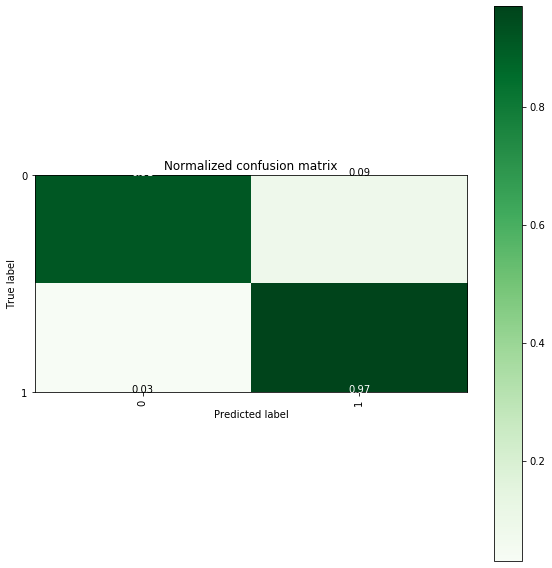

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       230
           1       0.93      0.97      0.95       267

    accuracy                           0.94       497
   macro avg       0.95      0.94      0.94       497
weighted avg       0.94      0.94      0.94       497



In [0]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm5 = SVC(kernel='rbf')
rbf_svm_grid5 = GridSearchCV(rbf_svm5,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results5 = perform_model(rbf_svm_grid5, X_train5, y_train5, X_test5, y_test5, class_labels=labels)


training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.103663


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000443


---------------------
|      Accuracy      |
---------------------

    0.9557344064386318


--------------------
| Confusion Matrix |
--------------------

 [[223   7]
 [ 15 252]]


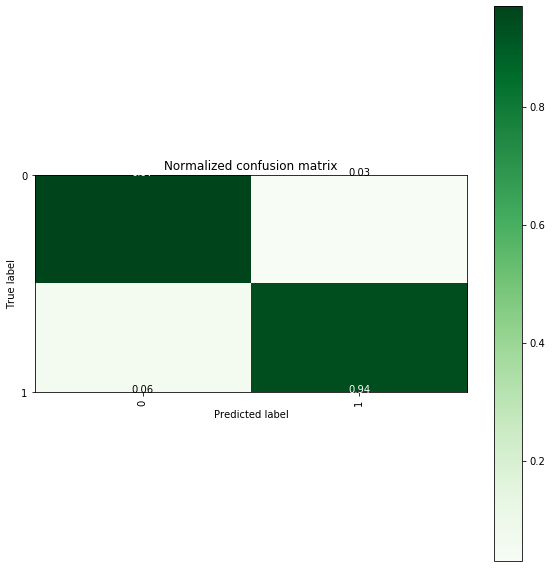

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       230
           1       0.97      0.94      0.96       267

    accuracy                           0.96       497
   macro avg       0.95      0.96      0.96       497
weighted avg       0.96      0.96      0.96       497



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
labels=[0,1]
lr_svc5 = LinearSVC(tol=0.00005)
lr_svc_grid5 = GridSearchCV(lr_svc5, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results5 = perform_model(lr_svc_grid5, X_train5, y_train5, X_test5, y_test5, class_labels=labels)


In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results5['accuracy'] * 100,\
                                                  100-(log_reg_grid_results5['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results5['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results5['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results5['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results5['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 91.95%       8.048%
Linear SVC          : 95.57%       4.427% 
rbf SVM classifier  : 94.37%      5.634% 


# Standard Scaler & Normalization

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.097639


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000649


---------------------
|      Accuracy      |
---------------------

    0.9839034205231388


--------------------
| Confusion Matrix |
--------------------

 [[224   6]
 [  2 265]]


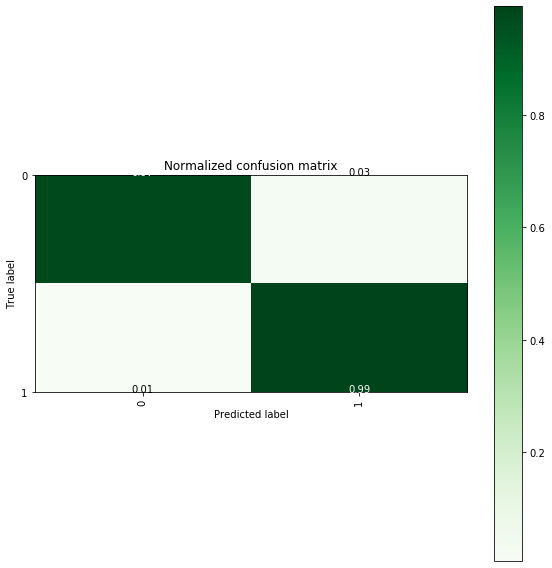

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       230
           1       0.98      0.99      0.99       267

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



In [0]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2','l1']}
log_reg3 = linear_model.LogisticRegression()
log_reg_grid3 = GridSearchCV(log_reg3, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results3 =  perform_model(log_reg_grid3, X_train3, y_train3, X_test3, y_test3, class_labels=labels)

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.464326


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003663


---------------------
|      Accuracy      |
---------------------

    0.9758551307847082


--------------------
| Confusion Matrix |
--------------------

 [[223   7]
 [  5 262]]


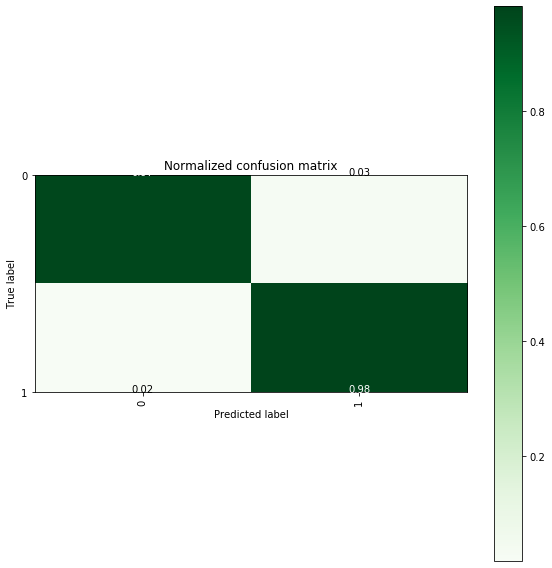

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       230
           1       0.97      0.98      0.98       267

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



In [0]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm3 = SVC(kernel='rbf')
rbf_svm_grid3 = GridSearchCV(rbf_svm3,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results3 = perform_model(rbf_svm_grid3, X_train3, y_train3, X_test3, y_test3, class_labels=labels)

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.178292


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000558


---------------------
|      Accuracy      |
---------------------

    0.9839034205231388


--------------------
| Confusion Matrix |
--------------------

 [[225   5]
 [  3 264]]


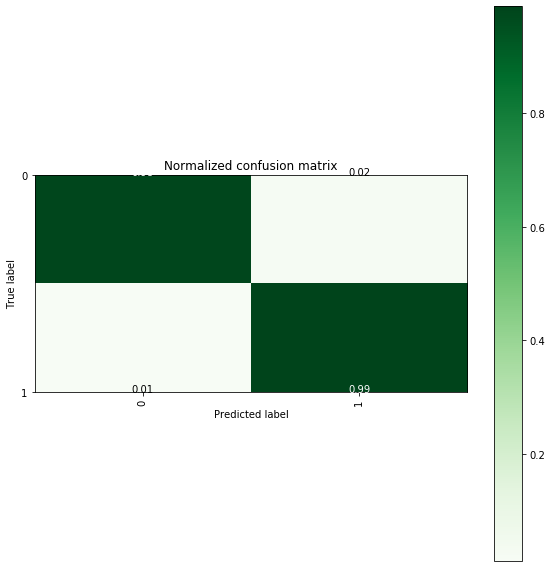

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       230
           1       0.98      0.99      0.99       267

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc3 = LinearSVC(tol=0.00005)
lr_svc_grid3 = GridSearchCV(lr_svc3, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results3 = perform_model(lr_svc_grid3, X_train3, y_train3, X_test3, y_test3, class_labels=labels)

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results3['accuracy'] * 100,\
                                                  100-(log_reg_grid_results3['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results3['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results3['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results3['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results3['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.39%       1.61%
Linear SVC          : 98.39%       1.61% 
rbf SVM classifier  : 97.59%      2.414% 


# MinMax Scaler - All Models - Best

#LR

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.379266


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000970


---------------------
|      Accuracy      |
---------------------

    0.9839034205231388


--------------------
| Confusion Matrix |
--------------------

 [[227   3]
 [  5 262]]


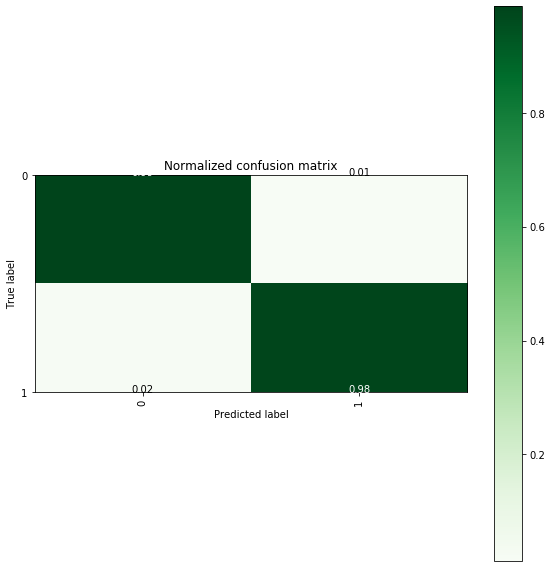

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.99      0.98      0.98       267

    accuracy                           0.98       497
   macro avg       0.98      0.98      0.98       497
weighted avg       0.98      0.98      0.98       497



In [0]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2','l1']}
log_reg4 = linear_model.LogisticRegression()
log_reg_grid4 = GridSearchCV(log_reg4, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results4 =  perform_model(log_reg_grid4, X_train4, y_train4, X_test4, y_test4, class_labels=labels)


#SVM RBF

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.224556


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003657


---------------------
|      Accuracy      |
---------------------

    0.9979879275653923


--------------------
| Confusion Matrix |
--------------------

 [[229   1]
 [  0 267]]


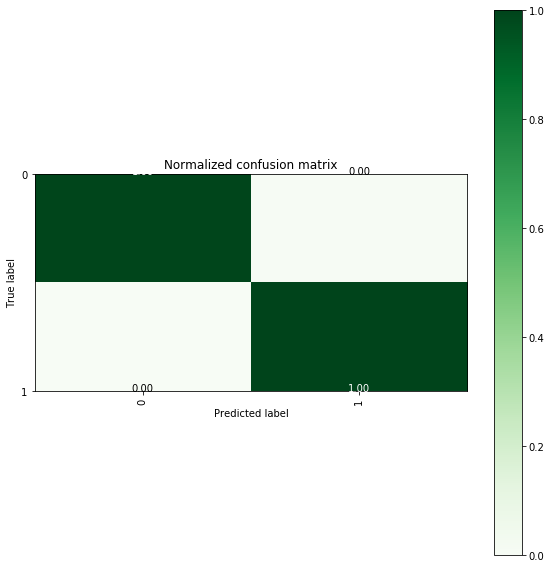

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       267

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



In [0]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm4 = SVC(kernel='rbf')
rbf_svm_grid4 = GridSearchCV(rbf_svm4,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results4 = perform_model(rbf_svm_grid4, X_train4, y_train4, X_test4, y_test4, class_labels=labels)


#SVC Linear

training the model..


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.8s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.091814


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000455


---------------------
|      Accuracy      |
---------------------

    0.9879275653923542


--------------------
| Confusion Matrix |
--------------------

 [[229   1]
 [  5 262]]


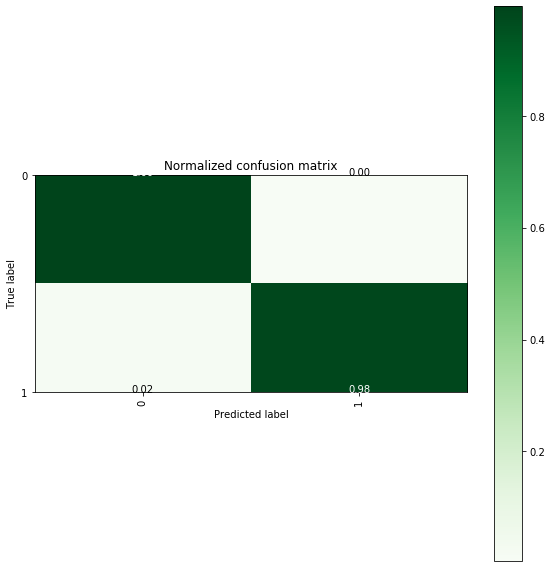

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       230
           1       1.00      0.98      0.99       267

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



In [0]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
labels=[0,1]
lr_svc4 = LinearSVC(tol=0.00005)
lr_svc_grid4 = GridSearchCV(lr_svc4, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results4 = perform_model(lr_svc_grid4, X_train4, y_train4, X_test4, y_test4, class_labels=labels)


#Comparision

In [0]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results4['accuracy'] * 100,\
                                                  100-(log_reg_grid_results4['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results4['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results4['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results4['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results4['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.39%       1.61%
Linear SVC          : 98.79%       1.207% 
rbf SVM classifier  : 99.8%      0.2012% 


In [0]:
(22*4 + 33 )*1.5 + 22*1.5
print( 15,'sec', 'Sliding Window')

214.5

#Best Model - Linear SVC

In [0]:
print_grid_search_attributes(lr_svc_grid_results4['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9900793650793651



In [0]:
import pickle
filename = PATH2+'finalized_model_3.sav'
pickle.dump(finalized_model_linear, open(filename, 'wb'),protocol=2)

In [35]:
finalized_model_linear=LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)


LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

In [37]:
finalized_model_linear.fit(X_new2,y)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)